<a href="https://colab.research.google.com/github/feniltailor22/Machine_Learning/blob/main/Malarial_cell_classification_using_Convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import os
import pandas as pd
from PIL import Image #for resize

In [3]:
image_directory= '/content/drive/MyDrive/cell_images/'

In [4]:
SIZE= 64

In [5]:
dataset= []
label= []

In [6]:
parasitized_img= os.listdir(image_directory+ 'Parasitized/Train/')

In [7]:
for i, image_name in enumerate(parasitized_img):
  if (image_name.split('.')[1]== 'png'):
    image= cv2.imread(image_directory+ 'Parasitized/Train/' + image_name)
    image= Image.fromarray(image, 'RGB')
    image= image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)
    
    #Call PIL.image.fromarray(obj, mode) with obj as a 3-D array and mode as "RGB" to convert obj into an image.

In [8]:
uninfected_img= os.listdir(image_directory+ 'Uninfected/Train/')

In [9]:
for i, image_name in enumerate(uninfected_img):
  if (image_name.split('.')[1]== 'png'):
    image= cv2.imread(image_directory+ 'Uninfected/Train/'+ image_name)
    image= Image.fromarray(image, 'RGB')
    image= image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(1)

In [10]:
#Building the model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense, Dense

In [48]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= (SIZE, SIZE, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 31, 31, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)      

In [50]:
from sklearn.model_selection import train_test_split

#Applying one-hot encoding to y_train data as Machine cannot understand categories.
from tensorflow.keras.utils import to_categorical

In [51]:
x_train, x_test, y_train, y_test= train_test_split(dataset, to_categorical(np.array(label)), test_size=0.20, random_state=0)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop= EarlyStopping(monitor='val_loss',patience=5)

In [61]:
model.fit(x=np.array(x_train),
          y=y_train,
          epochs=25,
          batch_size=64,
          validation_split= 0.1,
          verbose=True,
          shuffle= False,
          callbacks=[early_stop]
          )

Epoch 1/25
20/20 [==============================] - 7s 334ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.4123 - val_accuracy: 0.9353
Epoch 2/25
20/20 [==============================] - 7s 330ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.1624 - val_accuracy: 0.9353
Epoch 3/25
20/20 [==============================] - 7s 331ms/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 1.3147 - val_accuracy: 0.6547
Epoch 4/25
20/20 [==============================] - 7s 331ms/step - loss: 0.0158 - accuracy: 0.9936 - val_loss: 0.2146 - val_accuracy: 0.9424
Epoch 5/25
20/20 [==============================] - 7s 332ms/step - loss: 0.0115 - accuracy: 0.9952 - val_loss: 0.8183 - val_accuracy: 0.7554
Epoch 6/25
20/20 [==============================] - 7s 333ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.4419 - val_accuracy: 0.9209
Epoch 7/25
20/20 [==============================] - 7s 333ms/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.1548 - val_accuracy: 0.9424
Epoch 

In [62]:
losses= pd.DataFrame(data=model.history.history)

In [63]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.023198,0.991994,0.412263,0.935252
1,0.015835,0.995196,0.162397,0.935252
2,0.018121,0.992794,1.314736,0.654676
3,0.015823,0.993595,0.214562,0.942446
4,0.011546,0.995196,0.818268,0.755396


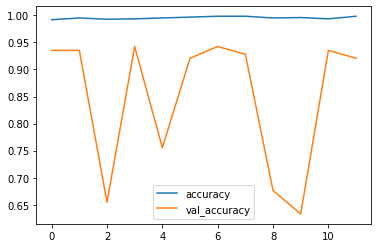

In [64]:
losses[['accuracy','val_accuracy']].plot()

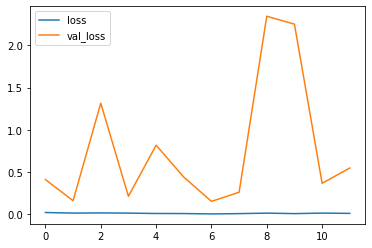

In [65]:
losses[['loss','val_loss']].plot()

In [66]:
model.evaluate(np.array(x_test), np.array(y_test))

11/11 [==============================] - 1s 48ms/step - loss: 0.6409 - accuracy: 0.9164


[0.6409347057342529, 0.9164265394210815]